In [ ]:
## importing data
import pandas as pd
a=pd.read_csv("water_potability.csv")
df=pd.DataFrame(a)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **This dataset about safe drinking water ot not checking it's an binary classification**

In [ ]:

df.shape

(3276, 10)

In [ ]:
## 1 means safe water for human consumption portable
df['Potability'].value_counts()
## Normal dataset

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

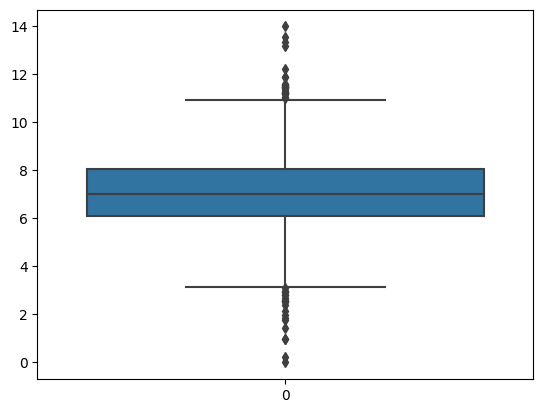

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['ph'])

<Axes: >

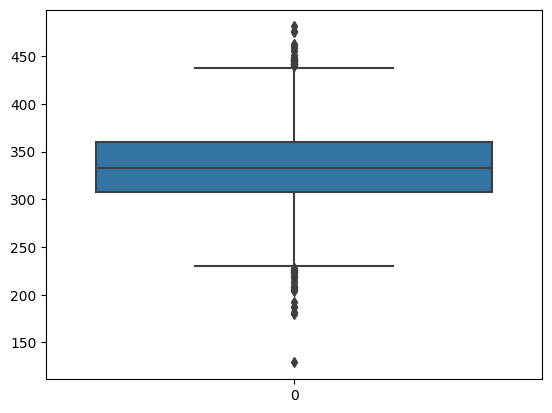

In [ ]:
sns.boxplot(df['Sulfate'])

<Axes: >

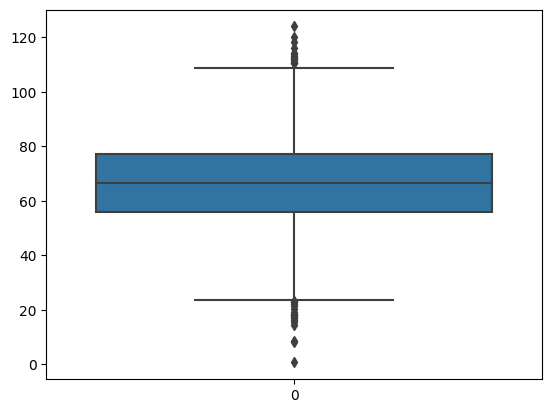

In [ ]:
sns.boxplot(df['Trihalomethanes'])


In [ ]:
## since they are outliers we can fill nan values using median
median1=df['ph'].median()
df['ph'].fillna(median1,inplace=True)
median2=df['Sulfate'].median()
df['Sulfate'].fillna(median2,inplace=True)
median3=df['Trihalomethanes'].median()
df['Trihalomethanes'].fillna(median3,inplace=True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
filtered_df = df[df['Potability'] == 1]
filtered_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,7.036752,169.974849,23403.637304,8.519730,333.073546,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
## independent and dependent variables
X=df.drop(['Potability'],axis='columns')
y=df['Potability']

In [ ]:
### train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
## using standaization for making value range between -1 to 1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [ ]:
X_train_scaled.shape

(2293, 9)

In [ ]:
X_test_scaled.shape

(983, 9)

# **Models Creation**

In [ ]:
!pip install scikit-learn==1.3.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 66.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
## using LogistiRegression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train_scaled,y_train)
y_pred=model1.predict(X_test_scaled)

## evaluation metrics

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

cr=classification_report(y_test,y_pred)
print('classification_report',cr)
cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix',cm)
sc=accuracy_score(y_test,y_pred)
print('The accuracy_score is ',sc)


classification_report               precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       1.00      0.00      0.01       366

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983

confusion_matrix [[617   0]
 [365   1]]
The accuracy_score is  0.6286876907426246


In [ ]:
## using RandomForest
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(X_train_scaled,y_train)
y_pred=model2.predict(X_test_scaled)
y_pred1=model2.predict(X_train_scaled)

## evaluation metrics

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

cr=classification_report(y_test,y_pred)
print('classification_report',cr)
cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix',cm)
sc=accuracy_score(y_test,y_pred)
print('The accuracy_score for testing data ',sc)
c=accuracy_score(y_train,y_pred1)
print('The accuracy_score  for training data ',c)



classification_report               precision    recall  f1-score   support

           0       0.69      0.88      0.77       617
           1       0.62      0.34      0.44       366

    accuracy                           0.68       983
   macro avg       0.66      0.61      0.61       983
weighted avg       0.67      0.68      0.65       983

confusion_matrix [[541  76]
 [241 125]]
The accuracy_score for testing data  0.6775178026449644
The accuracy_score  for training data  1.0


# ***because of outliers our model was giving good results on testing data which may leads to overfitting we can overcome by this***


# 1.   Feature selection
### **2.   And also removing outliers using five number summary**



In [ ]:
## using support vector machine
from sklearn import svm
model3=svm.SVC(kernel='linear')
model3.fit(X_train_scaled,y_train)
y_pred=model3.predict(X_test_scaled)

## evaluation metrics

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

cr=classification_report(y_test,y_pred)
print('classification_report',cr)
cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix',cm)
sc=accuracy_score(y_test,y_pred)
print('The accuracy_score is ',sc)


classification_report               precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983

confusion_matrix [[617   0]
 [366   0]]
The accuracy_score is  0.6276703967446592


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
## using LogistiRegression
from sklearn.ensemble import AdaBoostClassifier
model4=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=50)
model4.fit(X_train_scaled,y_train)
y_pred=model4.predict(X_test_scaled)

## evaluation metrics

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

cr=classification_report(y_test,y_pred)
print('classification_report',cr)
cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix',cm)
sc=accuracy_score(y_test,y_pred)
print('The accuracy_score is ',sc)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


classification_report               precision    recall  f1-score   support

           0       0.65      0.89      0.75       617
           1       0.50      0.19      0.28       366

    accuracy                           0.63       983
   macro avg       0.58      0.54      0.51       983
weighted avg       0.60      0.63      0.57       983

confusion_matrix [[548  69]
 [296  70]]
The accuracy_score is  0.6286876907426246


In [ ]:
## from all the 4 models we will pick the randomForestclassifier because of better accuracy ..here we are not removed outliers because of that
# we got less accuracy



In [ ]:
## applying Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2']
}
from sklearn.model_selection import GridSearchCV
# Create a GridSearchCV object with the Random Forest classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Hyperparameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
## Model evaluation for gridsearchcv
cr=classification_report(y_test,y_pred)
print('classification_report',cr)
cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix',cm)
sc=accuracy_score(y_test,y_pred)
print('The accuracy_score is ',sc)


classification_report               precision    recall  f1-score   support

           0       0.70      0.88      0.78       617
           1       0.64      0.35      0.45       366

    accuracy                           0.68       983
   macro avg       0.67      0.62      0.61       983
weighted avg       0.67      0.68      0.66       983

confusion_matrix [[544  73]
 [238 128]]
The accuracy_score is  0.6836215666327569


In [ ]:
## Nothing accuracy not changed much for the randomforest

In [ ]:
## saving the model
import pickle
filename="purity_check.sav"
pickle.dump(model2,open(filename,'wb'))

In [ ]:
for columns in X.columns:
  print(columns)

ph
Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity
